In [181]:
from scipy.signal import convolve2d
from matplotlib import pyplot as plt
from collections import Counter
from skimage import feature
import seaborn as sb
import pandas as pd
import numpy as np
import cv2

##### We considered

Intensity
Solidity
#Edges

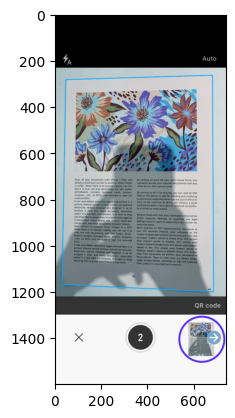

In [234]:
image = cv2.imread('./Images/scanned_image2.jpeg')
plt.imshow(image)

Counter({1: 858412, 0: 323988})


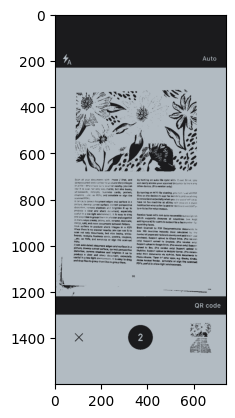

In [235]:
blurred_img = cv2.GaussianBlur(image,(11,11),0)
grayscale_img = cv2.cvtColor(blurred_img,cv2.COLOR_RGB2GRAY)

# edges_img = cv2.Canny(image=blurred_img,threshold1=50,threshold2=150)

# img_heatmap = sb.heatmap(data=grayscale_img,cmap='tab20')
# plt.show()

pixel_values = np.float32(image.reshape((-1,3)))

# Applying KMeans and getting back tuple of results (total min sq distance attained form centroids, labels, centers)
return_val1, labels, centers = cv2.kmeans(data=pixel_values,
                                            K=2,
                                            bestLabels=None,
                                            criteria=(cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS,1000,0.85),
                                            attempts=10,
                                            flags=cv2.KMEANS_RANDOM_CENTERS)

# Centers have to be of type non negative int
centers = np.uint8(centers)

print(Counter(labels.flatten()))

segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)

#### Shadow Removal from Scanned Image

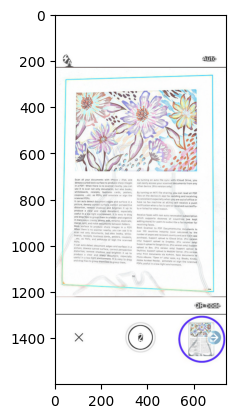

In [236]:
rgb_planes = cv2.split(image)

result_planes = []
result_norm_planes = []

for plane in rgb_planes:
    dilated_image = cv2.dilate(plane,np.ones((7,7),np.uint8))
    bg_img = cv2.medianBlur(dilated_image,21)
    diff_img = 255 - cv2.absdiff(plane,bg_img)
    norm_img = cv2.normalize(diff_img,None,alpha=0,beta=255,norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

plt.imshow(result)

#### Wolfram code trial